# Data Preprocecssing
## 1 Loading the Data
We'll start by loading some useful libraries and the data

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
raw_data = pd.read_csv('../data/AB_NYC_2019.csv')

## 2 Checking the Data
Look at a sample of the data, some statistics, and basic plots.
This serves to guide our cleaning process and note any relationships we should be aware of later.

In [236]:
raw_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [237]:
print(raw_data['neighbourhood_group'].unique())
print(raw_data['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [238]:
print(raw_data.shape)
print(10052/raw_data.shape[0])
pd.concat([raw_data.isnull().sum(), raw_data.dtypes], axis=1, keys=['Null Count', 'Data Types'])

(48895, 16)
0.20558339298496778


,Null Count,Data Types
id,0,int64
name,16,object
host_id,0,int64
host_name,21,object
neighbourhood_group,0,object
neighbourhood,0,object
latitude,0,float64
longitude,0,float64
room_type,0,object
price,0,int64


`last_review` is a string type, we might prefer to convert it into a numeric type.

In [239]:
raw_data['last_review_date'] = pd.to_datetime(raw_data['last_review'])
raw_data.drop(['last_review'], axis=1).describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,38843
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,2018-10-04 01:47:23.910099456
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,2011-03-28 00:00:00
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,2018-07-08 00:00:00
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,2019-05-19 00:00:00
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,2019-06-23 00:00:00
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019-07-08 00:00:00
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,NaN


From the above, we can see a few interesting things to note. Aside from `name` and `host_name`, the text fields appear to be formatted consistently.
The interquartile differences for columns related to price, nights and reviews indicate a positively skewed distribution with significant outliers.
There are a few null values for `name` and `host_name`, those rows could be dropped, however, they are unlikely to be useful for our analysis. Therefore, dropping the columns is also an option. The columns for `last_review` and `reviews_per_month` are roughtly 20% null. There are some outdated listings in this data set as well based on the minimum of the `last_review_date` column.

Next, look for relationships that could inform further cleaning decisions. For example, the 25th percentile for `number_of_reviews` is 1, suggesting that null `last_review` and `reviews_per_month` could be related to having no reviews.

In [240]:
raw_data[raw_data['number_of_reviews'] == 0].isnull().sum()

id                                    0
name                                 10
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
last_review_date                  10052
dtype: int64

It is clear that having no reviews fully explains null entries for `last_review` and `reviews_per_month`, it also might be related to some of the null name values.

<Axes: >

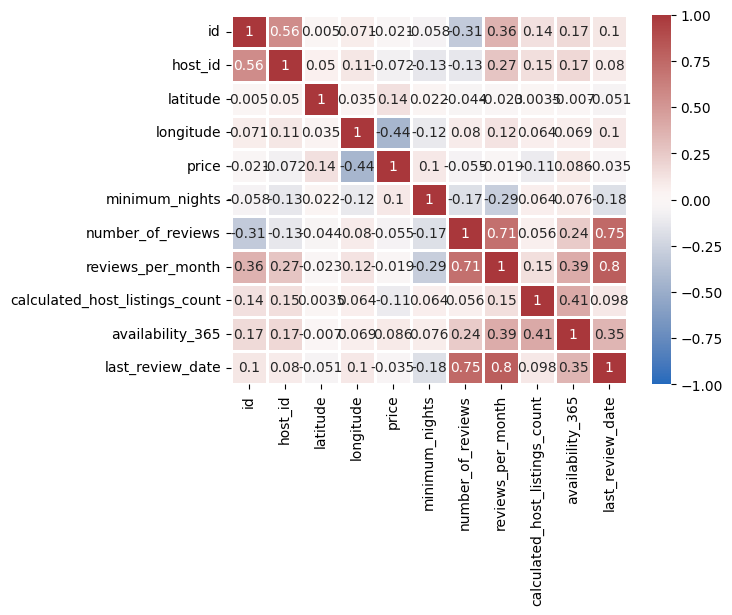

In [241]:
numeric_data = raw_data.select_dtypes(include=[np.number, np.datetime64])

# Using Spearman correlation, we have not yet removed outliers or tested for normality.
sns.heatmap(numeric_data.corr(method='spearman'), annot=True, cmap='vlag', linewidths=0.8, vmin=-1, vmax=1)

There are some interesting relationships to note here, `id` and `host_id` weakly correlate, suggesting that they are sequential, and could be used as a proxy for the age of the listing or host.
The relationship of `number_of_reviews` with `last_review` and `reviews_per_month` is moderate, so removing the null-filled `last_review` and `reviews_per_month` columns may be reasonable. Most machine learning approaches work best with uncorrelated features.


## 3 Cleaning the Data
In the above section, we made note of several issues with the data that need to be addressed:

- `last_review` should be a numeric type. It also has null values without an obvious default value. It will be dropped.
- `name` and `host_name` contain null values and are not easy to process into features. They can be removed.
- ID values are usually noise, but in this case, they could be used to engineer a feature approximately representing a listing's age. 
Unless later analysis determines a need to group by host or approximate age, these columns can be dropped.
- `reviews_per_month` contains null values, with 0 being an obvious choice of default value.

During the initial exploration, `last_review_date` was created. It could be used to filter outdated listings with comparison operators if the null values are handled. It will be dropped unless there is a reason to filter older listings as well as drop the null values.

<Axes: xlabel='last_review_date', ylabel='Count'>

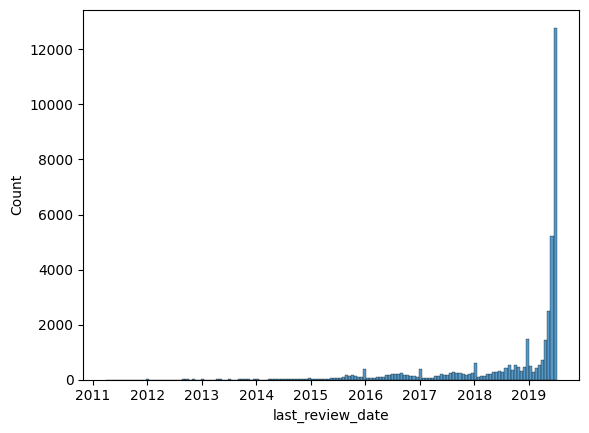

In [242]:
sns.histplot(raw_data.dropna()['last_review_date'])

In [243]:
data = raw_data.drop(['id', 'name', 'host_id', 'host_name', 'last_review','last_review_date'], axis=1)
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<Axes: >

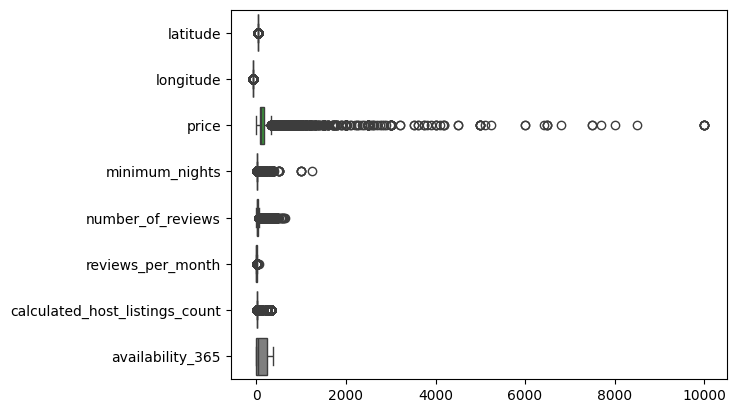

In [244]:
sns.boxplot(data, orient='h')

There are some significant outliers in the data. `price` has long tail that will cause problems with scaling, it also has some zero values. `minimum_nights` has some values that are greater than a year or more, and therefore do not represent the short term rental market. 

<Axes: >

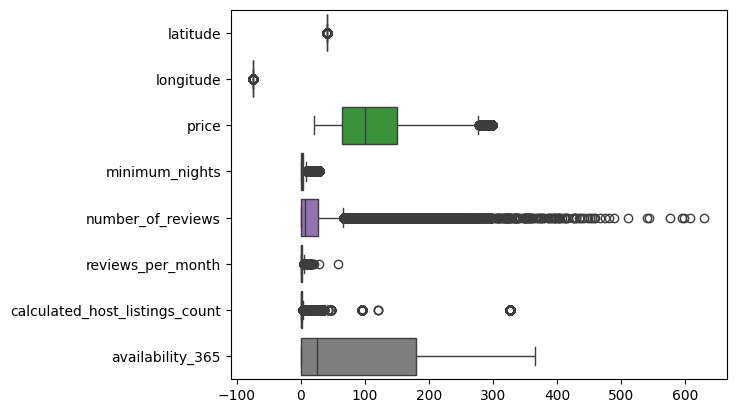

In [245]:
data_cleaned  = data[(data['minimum_nights'] < 30) 
                     & (data['price'] > 20) 
                     & (data['price'] < 300)  
                     ].copy()

sns.boxplot(data_cleaned, orient='h')

This has reduced the number of outlier listings, but there are still some long tails. The negative longitude values will also cause issues with some algorithms, however  scaling will address it.

<Axes: >

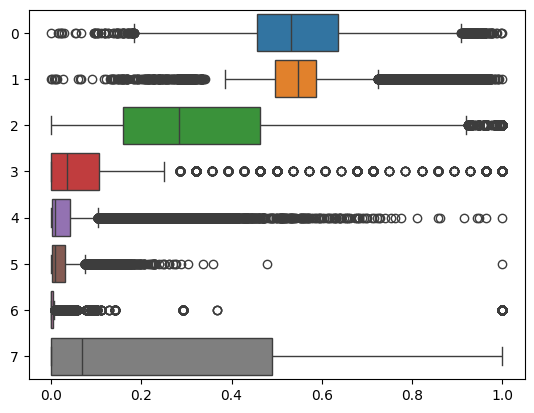

In [246]:
from sklearn.preprocessing import scale, minmax_scale
numeric_data = data_cleaned.select_dtypes(include=[np.number, np.datetime64])
sns.boxplot(minmax_scale(numeric_data), orient='h')

This scaling test indicates that outliers are still an issue with `calculated_host_listings_count`, `reviews_per_month`, `number_of_reviews` and `minimum_nights`. This will be kept in mind for processing the data

Converting the latitude & longitude to the distance (in KM) from the famous NYC landmarks

In [247]:
# Landmark coordinates
landmarks = {
    "Times Square": (40.7580, -73.9855),
    "Statue of Liberty": (40.6892, -74.0445),
    "Central Park": (40.7851, -73.9683),
    "Empire State Building": (40.7488, -73.9854),
    "Brooklyn Bridge": (40.7061, -73.9969),
    "One World Trade Center": (40.7128, -74.0131),
    "Metropolitan Museum of Art": (40.7794, -73.9632),
}

# Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Add distances to landmarks
for landmark, coords in landmarks.items():
    data_cleaned[f"distance_to_{landmark.replace(' ', '_')}"] = data_cleaned.apply(
        lambda row: haversine(row['latitude'], row['longitude'], coords[0], coords[1]), axis=1
    )

# Drop latitude & longtitude
# data_cleaned = data_cleaned.drop(columns=['latitude', 'longitude'])

In [248]:
data_preprocessed.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,distance_to_Times_Square,distance_to_Statue_of_Liberty,distance_to_Central_Park,distance_to_Empire_State_Building,distance_to_Brooklyn_Bridge,distance_to_One_World_Trade_Center,distance_to_Metropolitan_Museum_of_Art,availability_percentage
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,12.337898,7.649799,15.305378,11.318587,6.837559,8.033374,14.688071,100.000000
1,Manhattan,Midtown,Entire home/apt,225,1,40,0.38,2,0.508366,8.803656,3.734987,0.553268,5.398568,5.168139,3.349388,97.260274
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,6.757240,15.881167,3.465981,7.632440,12.346239,12.265111,3.750044,100.000000
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,40,4.64,1,8.387034,7.159264,11.138311,7.401157,3.903320,5.447904,10.485241,53.150685
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,5.701496,14.813350,2.532135,6.535489,11.200439,11.167655,2.670366,0.000000


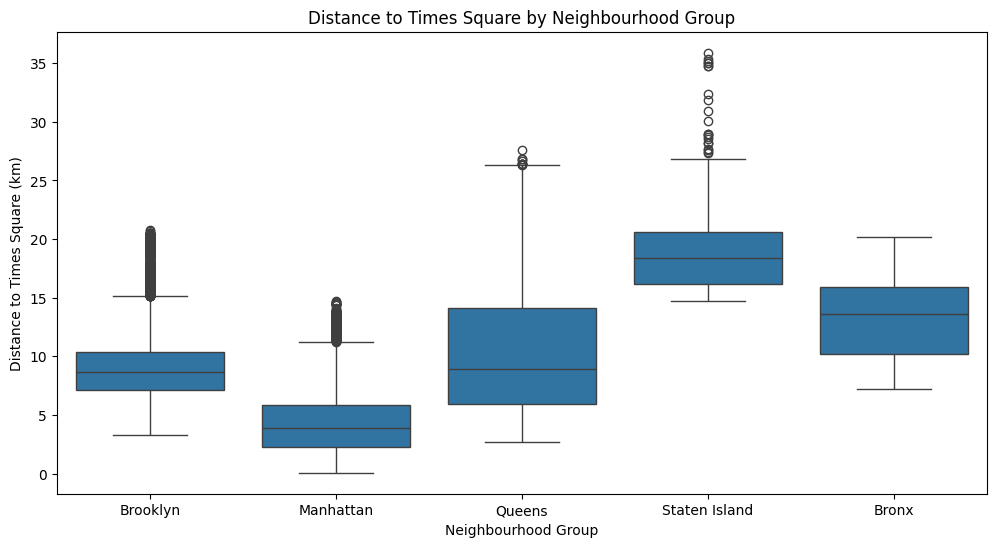

In [249]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='neighbourhood_group', y='distance_to_Times_Square')
plt.title("Distance to Times Square by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Distance to Times Square (km)")
plt.show()


Finally, we convert the total days available to the percentage for an easier interpretation.

In [250]:
data_cleaned['availability_percentage'] = (data_cleaned['availability_365'] / 365) * 100

In [251]:
data_cleaned = data_cleaned.drop(columns=['availability_365'])
data_cleaned.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,distance_to_Times_Square,distance_to_Statue_of_Liberty,distance_to_Central_Park,distance_to_Empire_State_Building,distance_to_Brooklyn_Bridge,distance_to_One_World_Trade_Center,distance_to_Metropolitan_Museum_of_Art,availability_percentage
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,12.337898,7.649799,15.305378,11.318587,6.837559,8.033374,14.688071,100.000000
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,0.508366,8.803656,3.734987,0.553268,5.398568,5.168139,3.349388,97.260274
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,6.757240,15.881167,3.465981,7.632440,12.346239,12.265111,3.750044,100.000000
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,8.387034,7.159264,11.138311,7.401157,3.903320,5.447904,10.485241,53.150685
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,5.701496,14.813350,2.532135,6.535489,11.200439,11.167655,2.670366,0.000000


In [252]:
data_cleaned.to_csv('../data/cleaned_data.csv', index=False)

## 4 Preproccessing
As shown previously, there are still some outliers affecting the quality of the data, however, they are not extreme enough to drop.
The simplest solution is to set a ceiling for them.

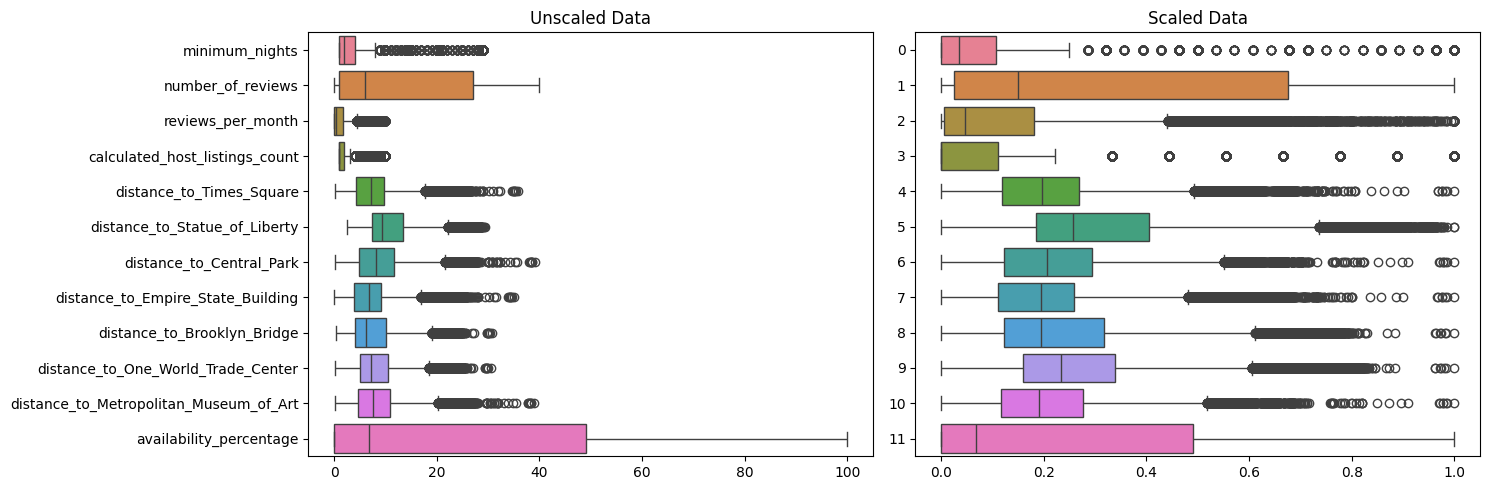

In [253]:
data_preprocessed = data_cleaned.copy()
data_preprocessed['number_of_reviews'] = data_preprocessed['number_of_reviews'].clip(upper=40)
data_preprocessed['reviews_per_month'] = data_preprocessed['reviews_per_month'].clip(upper=10)
data_preprocessed['calculated_host_listings_count'] = data_preprocessed['calculated_host_listings_count'].clip(upper=10)

numeric_data = data_preprocessed.select_dtypes(include=[np.number, np.datetime64]
                ).drop(['price'], axis=1) # This column is in an acceptable state and can be ignored for now

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=numeric_data, orient='h', ax=axes[0])
axes[0].set_title('Unscaled Data')
scaled_data = minmax_scale(numeric_data)
sns.boxplot(data=scaled_data, orient='h', ax=axes[1])
axes[1].set_title('Scaled Data')
plt.tight_layout()

In [254]:
data_preprocessed.to_csv('../data/processed_data.csv', index=False)